# Hospital Data Visualizations
## Comprehensive Visual Analysis of Hospital Data

This notebook contains key visualizations for:
- Data Quality Analysis
- Patient Demographics
- Clinical Patterns
- Admission/Discharge Analysis
- Readmission Insights
- Machine Learning Results

In [79]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create visualizations directory if it doesn't exist
import os
viz_dir = 'visualizations'
os.makedirs(viz_dir, exist_ok=True)

print("Libraries imported successfully!")
print(f"Visualizations will be saved to: {viz_dir}/")

Libraries imported successfully!
Visualizations will be saved to: visualizations/


In [80]:
# Load Datasets
print("Loading datasets...")

# Load cleaned data
patients_df = pd.read_csv('data/cleaned/clean_patients.csv')
visits_df = pd.read_csv('data/cleaned/clean_visits.csv')
diagnoses_df = pd.read_csv('data/cleaned/clean_diagnoses.csv')
medications_df = pd.read_csv('data/cleaned/clean_medications.csv')
staff_df = pd.read_csv('data/cleaned/clean_staff.csv')

# Load preprocessed data
master_df = pd.read_csv('data/preprocessed/master_patient_visits.csv')
ml_features_df = pd.read_csv('data/preprocessed/ml_ready_features.csv')

# Convert date columns and calculate Age
if 'admission_date' in visits_df.columns:
    visits_df['admission_date'] = pd.to_datetime(visits_df['admission_date'])
if 'discharge_date' in visits_df.columns:
    visits_df['discharge_date'] = pd.to_datetime(visits_df['discharge_date'])

# Calculate Age for patients
if 'dob' in patients_df.columns:
    patients_df['dob'] = pd.to_datetime(patients_df['dob'])
    patients_df['Age'] = (pd.Timestamp.now() - patients_df['dob']).dt.days // 365

# Calculate Age for master dataset
if 'dob' in master_df.columns:
    master_df['dob'] = pd.to_datetime(master_df['dob'])
    master_df['Age'] = (pd.Timestamp.now() - master_df['dob']).dt.days // 365

# Calculate Readmission (patient with more than 1 visit)
visit_counts = master_df.groupby('patient_id').size()
master_df['Readmission'] = master_df['patient_id'].map(visit_counts) > 1
master_df['Readmission'] = master_df['Readmission'].astype(int)

print(f"✓ Patients: {len(patients_df):,} records")
print(f"✓ Visits: {len(visits_df):,} records")
print(f"✓ Diagnoses: {len(diagnoses_df):,} records")
print(f"✓ Master Dataset: {len(master_df):,} records")
print("\nDatasets loaded successfully!")

Loading datasets...
✓ Patients: 3,000 records
✓ Visits: 2,481 records
✓ Diagnoses: 7,998 records
✓ Master Dataset: 2,481 records

Datasets loaded successfully!
✓ Patients: 3,000 records
✓ Visits: 2,481 records
✓ Diagnoses: 7,998 records
✓ Master Dataset: 2,481 records

Datasets loaded successfully!


In [81]:
# Check available columns in each dataset
print("=" * 80)
print("DATASET COLUMN INSPECTION")
print("=" * 80)

print("\n📋 Patients Dataset Columns:")
print(patients_df.columns.tolist())
print(f"Sample data:\n{patients_df.head(2)}")

print("\n📋 Visits Dataset Columns:")
print(visits_df.columns.tolist())
print(f"Sample data:\n{visits_df.head(2)}")

print("\n📋 Master Dataset Columns:")
print(master_df.columns.tolist())
print(f"Sample data:\n{master_df.head(2)}")

print("\n📋 Diagnoses Dataset Columns:")
print(diagnoses_df.columns.tolist())
print(f"Sample data:\n{diagnoses_df.head(2)}")

DATASET COLUMN INSPECTION

📋 Patients Dataset Columns:
['patient_id', 'name', 'dob', 'gender', 'contact_number', 'email', 'address', 'Age']
Sample data:
  patient_id            name        dob gender   contact_number  \
0     P10000    Norma Fisher 1970-12-28   Male  +1-728-588-5986   
1     P10001  Jorge Sullivan 2010-01-14   Male     257-367-8090   

                       email  \
0          kayla44@ayers.com   
1  paulwheeler@contreras.com   

                                             address  Age  
0  8048 Sanford Route Apt. 223, Pricemouth, UT 61625   54  
1   312 Lee Crossroad Apt. 374, Lake Amber, WY 93566   15  

📋 Visits Dataset Columns:
['visit_id', 'patient_id', 'admission_date', 'discharge_date', 'admission_type', 'hospital_unit_id', 'attending_physician_id', 'length_of_stay']
Sample data:
  visit_id patient_id admission_date discharge_date admission_type  \
0   V20000     P12422     2023-11-14     2024-08-29        Walk-in   
1   V20002     P11669     2024-09-04     20

## 1. Data Quality Visualizations

Creating correlation matrix heatmap...


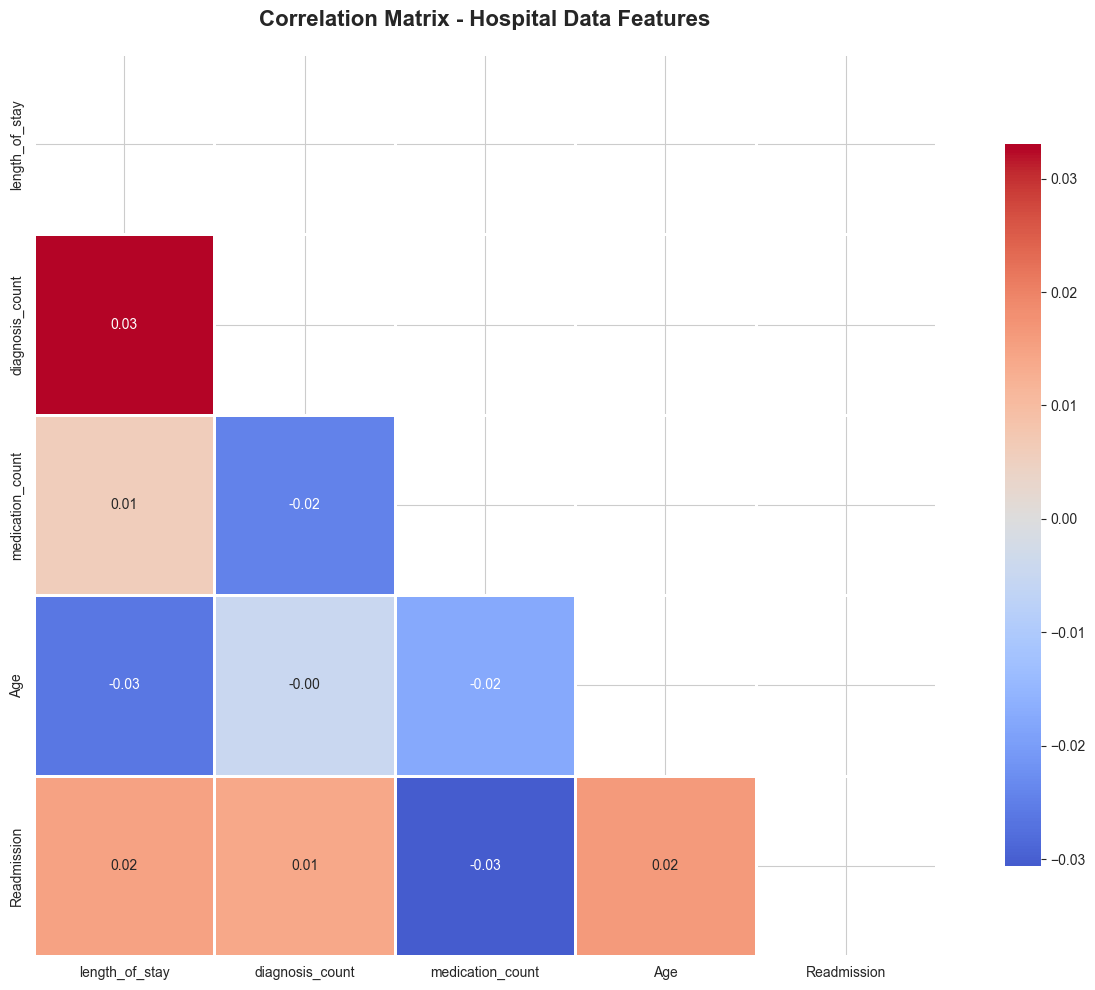

✓ Correlation matrix saved!


In [82]:
# Correlation Matrix Heatmap
print("Creating correlation matrix heatmap...")

# Select numerical columns from master dataset
numerical_cols = master_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = master_df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Hospital Data Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{viz_dir}/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Correlation matrix saved!")

## 2. Patient Demographics & Characteristics

Creating age distribution visualization...


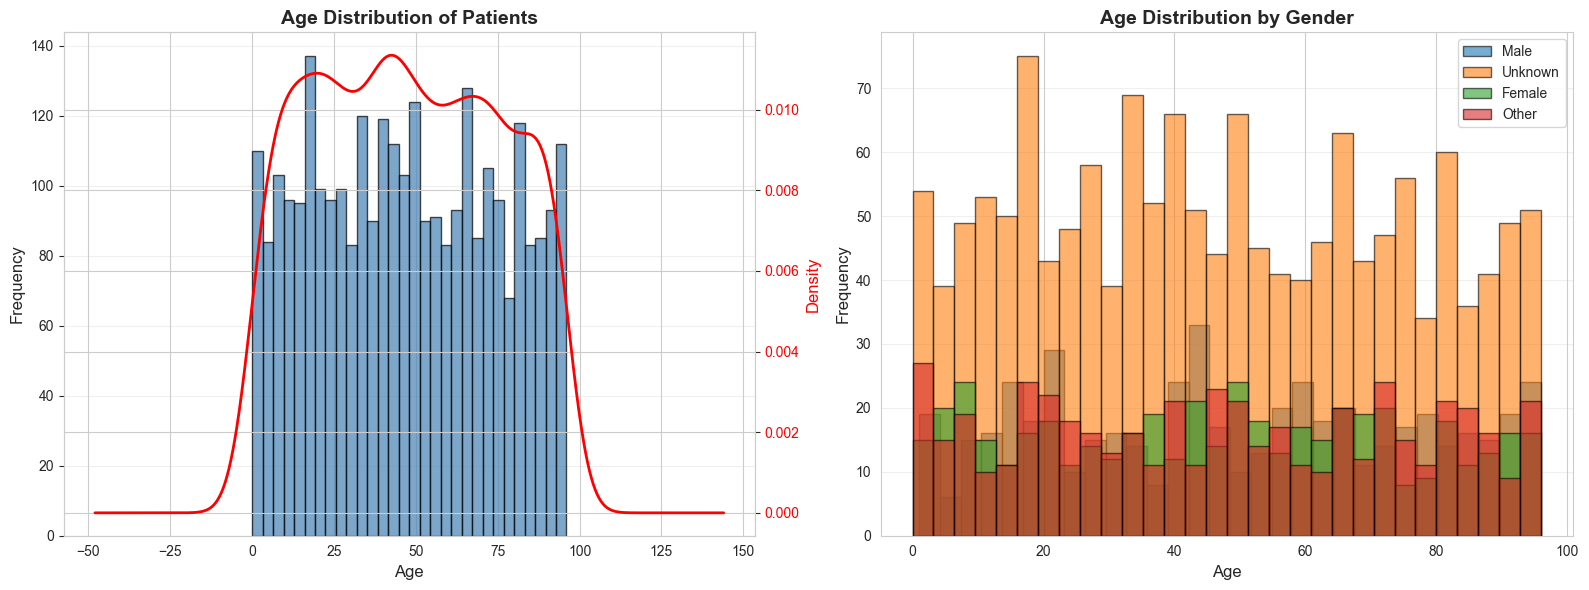

✓ Age distribution saved!


In [83]:
# Age Distribution with KDE
print("Creating age distribution visualization...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with KDE
if 'Age' in patients_df.columns:
    axes[0].hist(patients_df['Age'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0].set_xlabel('Age', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Age Distribution of Patients', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add KDE
    ax2 = axes[0].twinx()
    patients_df['Age'].plot(kind='kde', ax=ax2, color='red', linewidth=2)
    ax2.set_ylabel('Density', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

# Age distribution by Gender
if 'Age' in patients_df.columns and 'gender' in patients_df.columns:
    for gender in patients_df['gender'].unique():
        subset = patients_df[patients_df['gender'] == gender]['Age']
        axes[1].hist(subset, bins=30, alpha=0.6, label=gender, edgecolor='black')
    axes[1].set_xlabel('Age', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{viz_dir}/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Age distribution saved!")

In [ ]:
# Gender-specific Readmission Rates
print("Creating readmission analysis by gender...")

if 'gender' in master_df.columns and 'Readmission' in master_df.columns:
    readmission_gender = master_df.groupby('gender')['Readmission'].agg(['sum', 'count'])
    readmission_gender['Rate'] = (readmission_gender['sum'] / readmission_gender['count']) * 100
    
    fig = go.Figure(data=[
        go.Bar(x=readmission_gender.index, 
               y=readmission_gender['Rate'],
               text=readmission_gender['Rate'].round(2),
               textposition='auto',
               marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ])
    
    fig.update_layout(
        title='Readmission Rate by Gender',
        xaxis_title='Gender',
        yaxis_title='Readmission Rate (%)',
        template='plotly_white',
        height=500
    )
    
    fig.write_html(f'{viz_dir}/readmission_by_gender.html')
    fig.show()
    print("✓ Gender readmission analysis saved!")
else:
    print("⚠ Gender or Readmission column not found")

Creating readmission analysis by gender...


✓ Gender readmission analysis saved!


## 3. Admission & Discharge Patterns

In [85]:
# Time Series of Admissions
print("Creating admission time series...")

if 'admission_date' in visits_df.columns:
    # Daily admissions
    daily_admissions = visits_df.groupby(visits_df['admission_date'].dt.date).size().reset_index()
    daily_admissions.columns = ['Date', 'Admissions']
    daily_admissions['Date'] = pd.to_datetime(daily_admissions['Date'])
    
    # Monthly admissions
    visits_df['YearMonth'] = visits_df['admission_date'].dt.to_period('M')
    monthly_admissions = visits_df.groupby('YearMonth').size().reset_index()
    monthly_admissions.columns = ['YearMonth', 'Admissions']
    monthly_admissions['YearMonth'] = monthly_admissions['YearMonth'].astype(str)
    
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=('Daily Admissions', 'Monthly Admissions Trend'),
        vertical_spacing=0.15
    )
    
    # Daily trend
    fig.add_trace(
        go.Scatter(x=daily_admissions['Date'], y=daily_admissions['Admissions'],
                   mode='lines', name='Daily', line=dict(color='steelblue', width=1)),
        row=1, col=1
    )
    
    # Monthly trend
    fig.add_trace(
        go.Bar(x=monthly_admissions['YearMonth'], y=monthly_admissions['Admissions'],
               name='Monthly', marker_color='coral'),
        row=2, col=1
    )
    
    fig.update_layout(height=800, showlegend=False, template='plotly_white',
                      title_text='Hospital Admission Patterns Over Time')
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Month", row=2, col=1)
    fig.update_yaxes(title_text="Number of Admissions", row=1, col=1)
    fig.update_yaxes(title_text="Number of Admissions", row=2, col=1)
    
    fig.write_html(f'{viz_dir}/admission_time_series.html')
    fig.show()
    print("✓ Admission time series saved!")
else:
    print("⚠ admission_date column not found")

Creating admission time series...


✓ Admission time series saved!


Creating day of week admission patterns...


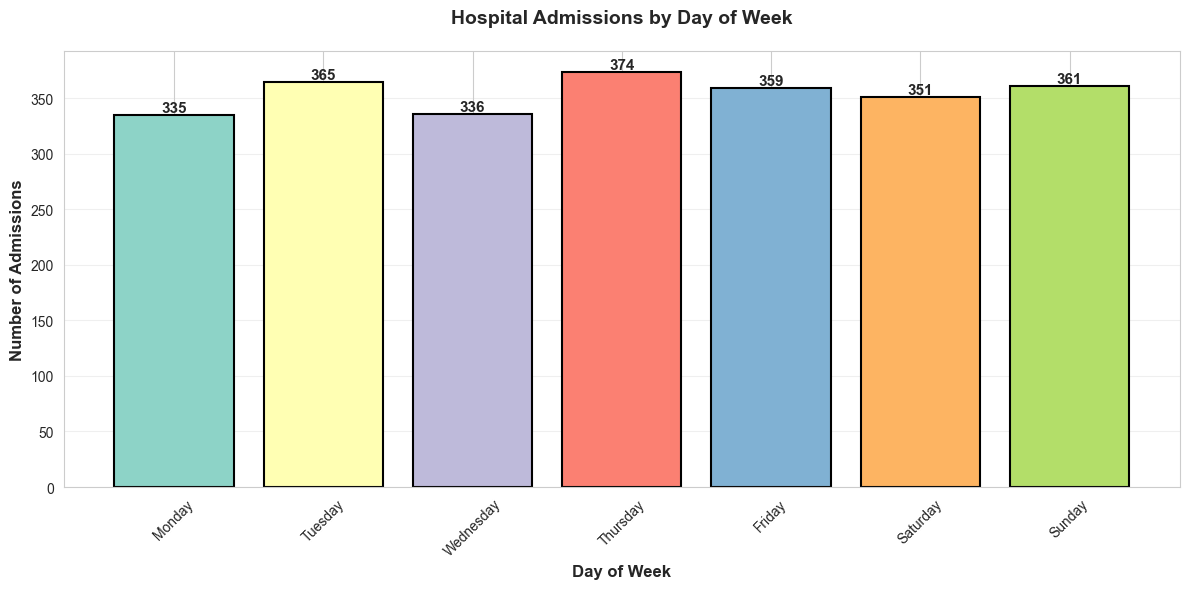

✓ Day of week patterns saved!


In [86]:
# Day of Week Admission Patterns
print("Creating day of week admission patterns...")

if 'admission_date' in visits_df.columns:
    visits_df['DayOfWeek'] = visits_df['admission_date'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_admissions = visits_df['DayOfWeek'].value_counts().reindex(day_order)
    
    plt.figure(figsize=(12, 6))
    colors = plt.cm.Set3(range(len(dow_admissions)))
    bars = plt.bar(dow_admissions.index, dow_admissions.values, color=colors, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Admissions', fontsize=12, fontweight='bold')
    plt.title('Hospital Admissions by Day of Week', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/admissions_by_day.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Day of week patterns saved!")
else:
    print("⚠ admission_date column not found")

Creating Length of Stay (LOS) analysis...


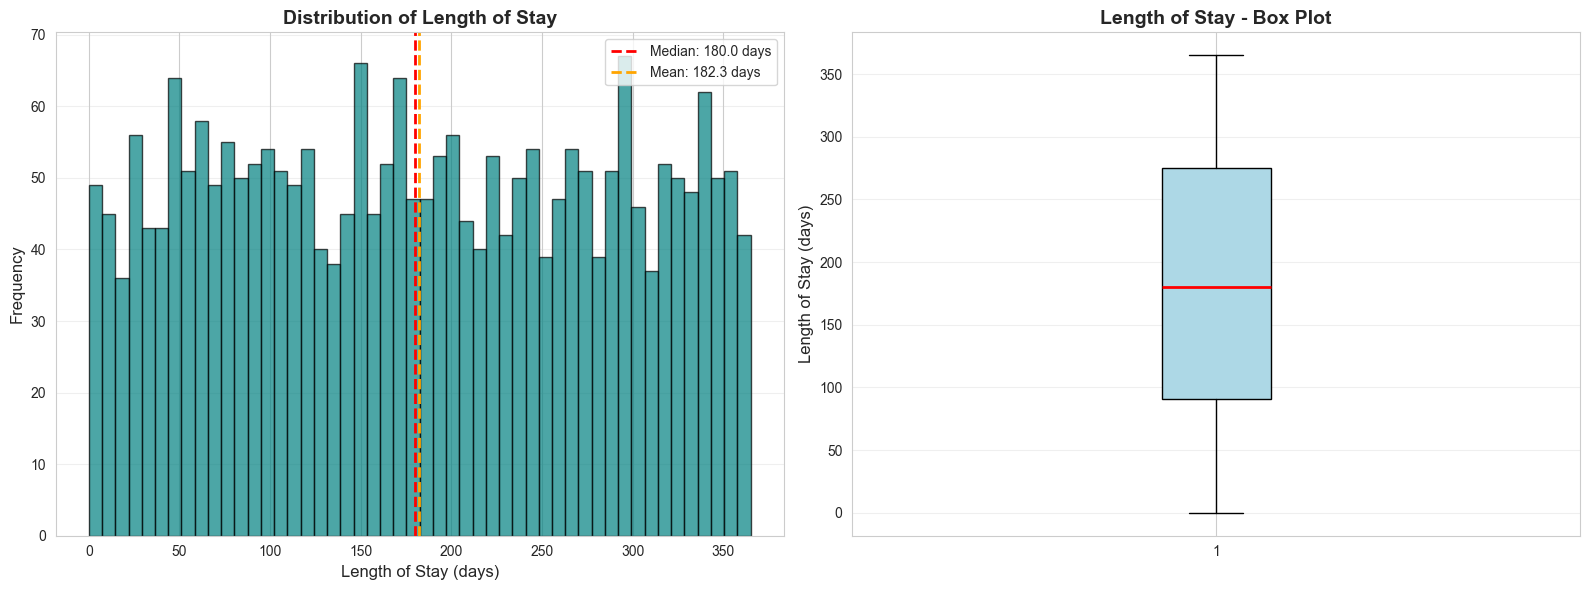

✓ LOS Analysis saved!
  Mean LOS: 182.27 days
  Median LOS: 180.00 days
  Std Dev: 105.07 days


In [87]:
# Length of Stay Analysis
print("Creating Length of Stay (LOS) analysis...")

if 'length_of_stay' in master_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram
    axes[0].hist(master_df['length_of_stay'], bins=50, color='teal', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('Length of Stay (days)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Length of Stay', fontsize=14, fontweight='bold')
    axes[0].axvline(master_df['length_of_stay'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {master_df["length_of_stay"].median():.1f} days')
    axes[0].axvline(master_df['length_of_stay'].mean(), color='orange', linestyle='--', linewidth=2, label=f'Mean: {master_df["length_of_stay"].mean():.1f} days')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Box plot
    axes[1].boxplot(master_df['length_of_stay'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'))
    axes[1].set_ylabel('Length of Stay (days)', fontsize=12)
    axes[1].set_title('Length of Stay - Box Plot', fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/length_of_stay_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✓ LOS Analysis saved!")
    print(f"  Mean LOS: {master_df['length_of_stay'].mean():.2f} days")
    print(f"  Median LOS: {master_df['length_of_stay'].median():.2f} days")
    print(f"  Std Dev: {master_df['length_of_stay'].std():.2f} days")
else:
    print("⚠ length_of_stay column not found")

## 4. Clinical Data Visualizations

In [88]:
# Top 20 Most Common Diagnoses
print("Creating top diagnoses visualization...")

if 'description' in diagnoses_df.columns:
    top_diagnoses = diagnoses_df['description'].value_counts().head(20)
    
    fig = go.Figure(data=[
        go.Bar(y=top_diagnoses.index[::-1], 
               x=top_diagnoses.values[::-1],
               orientation='h',
               text=top_diagnoses.values[::-1],
               textposition='auto',
               marker=dict(color=top_diagnoses.values[::-1], 
                          colorscale='Viridis',
                          showscale=True))
    ])
    
    fig.update_layout(
        title='Top 20 Most Common Diagnoses',
        xaxis_title='Number of Cases',
        yaxis_title='Diagnosis',
        height=700,
        template='plotly_white',
        showlegend=False
    )
    
    fig.write_html(f'{viz_dir}/top_diagnoses.html')
    fig.show()
    print("✓ Top diagnoses saved!")
else:
    print("⚠ description column not found")

Creating top diagnoses visualization...


✓ Top diagnoses saved!


In [89]:
# ICD-10 Code Distribution by Chapter
print("Creating ICD-10 chapter distribution...")

if 'icd_code' in diagnoses_df.columns:
    # Extract first letter of ICD-10 code for chapter classification
    diagnoses_df['ICD_Chapter'] = diagnoses_df['icd_code'].astype(str).str[0]
    chapter_counts = diagnoses_df['ICD_Chapter'].value_counts()
    
    fig = go.Figure(data=[
        go.Pie(labels=chapter_counts.index, 
               values=chapter_counts.values,
               hole=0.4,
               textinfo='label+percent',
               marker=dict(line=dict(color='white', width=2)))
    ])
    
    fig.update_layout(
        title='ICD-10 Code Distribution by Chapter',
        height=600,
        template='plotly_white'
    )
    
    fig.write_html(f'{viz_dir}/icd10_chapter_distribution.html')
    fig.show()
    print("✓ ICD-10 chapter distribution saved!")
else:
    print("⚠ icd_code column not found")

Creating ICD-10 chapter distribution...


✓ ICD-10 chapter distribution saved!


## 5. Readmission Analysis

Creating readmission rate by age group...


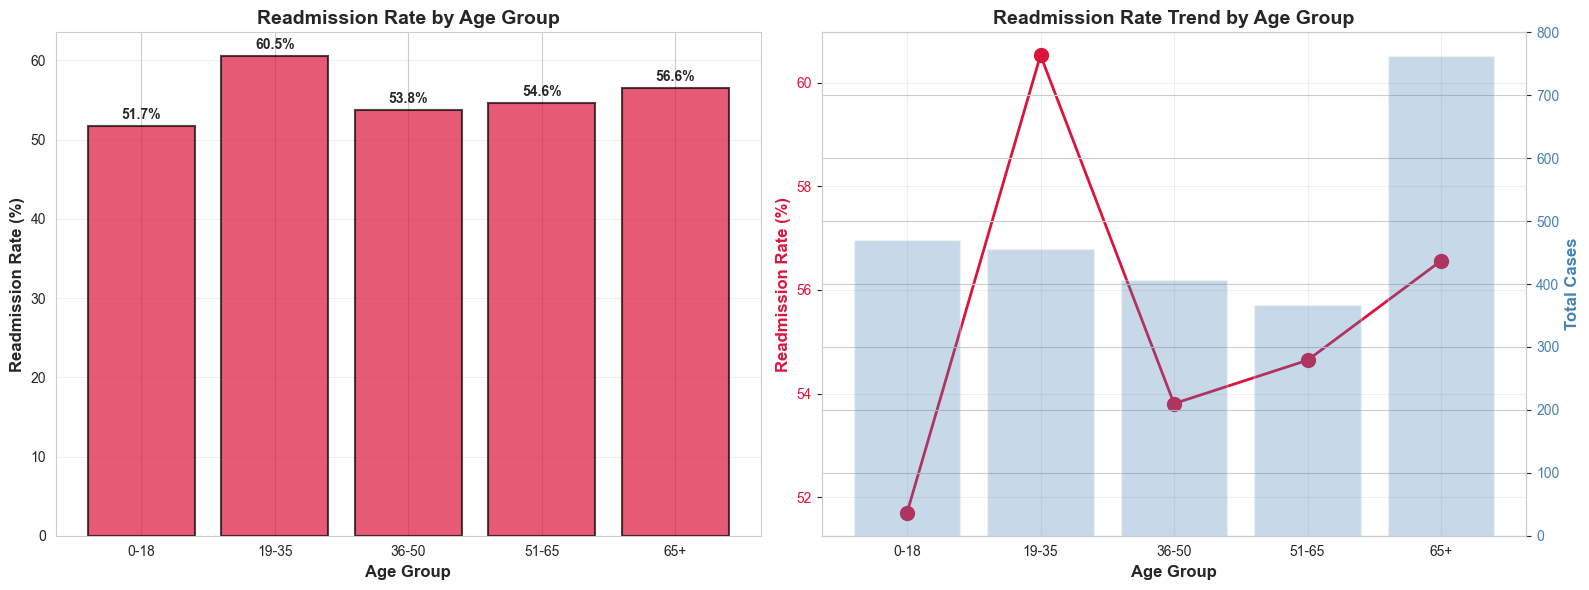

✓ Readmission by age group saved!


In [90]:
# Readmission Rate by Age Group
print("Creating readmission rate by age group...")

if 'Age' in master_df.columns and 'Readmission' in master_df.columns:
    # Create age groups
    master_df['AgeGroup'] = pd.cut(master_df['Age'], 
                                    bins=[0, 18, 35, 50, 65, 100],
                                    labels=['0-18', '19-35', '36-50', '51-65', '65+'])
    
    readmission_age = master_df.groupby('AgeGroup')['Readmission'].agg(['sum', 'count'])
    readmission_age['Rate'] = (readmission_age['sum'] / readmission_age['count']) * 100
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    axes[0].bar(readmission_age.index.astype(str), readmission_age['Rate'], 
                color='crimson', alpha=0.7, edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('Age Group', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Readmission Rate (%)', fontsize=12, fontweight='bold')
    axes[0].set_title('Readmission Rate by Age Group', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(readmission_age['Rate']):
        axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Line plot with counts
    ax2 = axes[1]
    x_pos = range(len(readmission_age))
    ax2.plot(x_pos, readmission_age['Rate'], marker='o', linewidth=2, markersize=10, color='crimson', label='Rate')
    ax2.set_xlabel('Age Group', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Readmission Rate (%)', fontsize=12, fontweight='bold', color='crimson')
    ax2.set_title('Readmission Rate Trend by Age Group', fontsize=14, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='crimson')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(readmission_age.index.astype(str))
    ax2.grid(alpha=0.3)
    
    # Add secondary axis for counts
    ax3 = ax2.twinx()
    ax3.bar(x_pos, readmission_age['count'], alpha=0.3, color='steelblue', label='Total Cases')
    ax3.set_ylabel('Total Cases', fontsize=12, fontweight='bold', color='steelblue')
    ax3.tick_params(axis='y', labelcolor='steelblue')
    
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/readmission_by_age_group.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Readmission by age group saved!")
else:
    print("⚠ Age or Readmission column not found")

In [91]:
# Readmission Rate by LOS Category
print("Creating readmission rate by LOS category...")

if 'length_of_stay' in master_df.columns and 'Readmission' in master_df.columns:
    # Create LOS categories
    master_df['LOS_Category'] = pd.cut(master_df['length_of_stay'], 
                                        bins=[0, 3, 7, 14, 1000],
                                        labels=['Short (1-3)', 'Medium (4-7)', 'Long (8-14)', 'Very Long (15+)'])
    
    readmission_los = master_df.groupby('LOS_Category')['Readmission'].agg(['sum', 'count'])
    readmission_los['Rate'] = (readmission_los['sum'] / readmission_los['count']) * 100
    
    fig = go.Figure()
    
    # Add bars
    fig.add_trace(go.Bar(
        x=readmission_los.index.astype(str),
        y=readmission_los['Rate'],
        text=readmission_los['Rate'].round(2),
        textposition='auto',
        marker_color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
        name='Readmission Rate'
    ))
    
    fig.update_layout(
        title='Readmission Rate by Length of Stay Category',
        xaxis_title='Length of Stay Category (days)',
        yaxis_title='Readmission Rate (%)',
        template='plotly_white',
        height=500
    )
    
    fig.write_html(f'{viz_dir}/readmission_by_los.html')
    fig.show()
    print("✓ Readmission by LOS category saved!")
else:
    print("⚠ length_of_stay or Readmission column not found")

Creating readmission rate by LOS category...


✓ Readmission by LOS category saved!


## 6. Machine Learning Model Visualizations

In [92]:
# Regression Model Comparison
print("Creating regression model comparison...")

try:
    regression_results = pd.read_csv('models/regression_model_comparison.csv')
    
    fig = go.Figure()
    
    # Add traces for each metric (use test metrics)
    metrics = [('test_r2', 'R² Score'), ('test_rmse', 'RMSE'), ('test_mae', 'MAE')]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    for (col, label), color in zip(metrics, colors):
        if col in regression_results.columns:
            fig.add_trace(go.Bar(
                name=label,
                x=regression_results['model'],
                y=regression_results[col],
                text=regression_results[col].round(3),
                textposition='auto',
                marker_color=color
            ))
    
    fig.update_layout(
        title='Regression Model Performance Comparison (Test Set)',
        xaxis_title='Model',
        yaxis_title='Score',
        barmode='group',
        template='plotly_white',
        height=600
    )
    
    fig.write_html(f'{viz_dir}/regression_model_comparison.html')
    fig.show()
    print("✓ Regression model comparison saved!")
except FileNotFoundError:
    print("⚠ Regression model results not found")

Creating regression model comparison...


✓ Regression model comparison saved!


In [93]:
# Classification Model Comparison
print("Creating classification model comparison...")

try:
    classification_results = pd.read_csv('models/classification_model_comparison.csv')
    
    fig = go.Figure()
    
    # Add traces for each metric (use correct column names)
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
    metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    
    for metric, label in zip(metrics, metric_labels):
        if metric in classification_results.columns:
            fig.add_trace(go.Scatter(
                name=label,
                x=classification_results['model'],
                y=classification_results[metric],
                mode='lines+markers',
                marker=dict(size=10),
                line=dict(width=3)
            ))
    
    fig.update_layout(
        title='Classification Model Performance Comparison',
        xaxis_title='Model',
        yaxis_title='Score',
        template='plotly_white',
        height=600,
        hovermode='x unified'
    )
    
    fig.write_html(f'{viz_dir}/classification_model_comparison.html')
    fig.show()
    print("✓ Classification model comparison saved!")
except FileNotFoundError:
    print("⚠ Classification model results not found")

Creating classification model comparison...


✓ Classification model comparison saved!


In [94]:
# Additional ML Model Insights - Detailed Comparison
print("Creating detailed ML model performance comparison...")

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Regression Models - R² Score', 
                    'Regression Models - RMSE',
                    'Classification Models - Accuracy',
                    'Classification Models - F1 Score'),
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Regression R2 Score (use test_r2)
if len(regression_results) > 0:
    fig.add_trace(
        go.Bar(x=regression_results['model'], 
               y=regression_results['test_r2'],
               name='R² Score',
               text=regression_results['test_r2'].round(3),
               textposition='auto',
               marker_color='steelblue'),
        row=1, col=1
    )
    
    # Regression RMSE (use test_rmse)
    fig.add_trace(
        go.Bar(x=regression_results['model'], 
               y=regression_results['test_rmse'],
               name='RMSE',
               text=regression_results['test_rmse'].round(2),
               textposition='auto',
               marker_color='coral'),
        row=1, col=2
    )

# Classification Accuracy
if len(classification_results) > 0:
    fig.add_trace(
        go.Bar(x=classification_results['model'], 
               y=classification_results['accuracy'],
               name='Accuracy',
               text=classification_results['accuracy'].round(3),
               textposition='auto',
               marker_color='lightgreen'),
        row=2, col=1
    )
    
    # Classification F1 Score
    fig.add_trace(
        go.Bar(x=classification_results['model'], 
               y=classification_results['f1_score'],
               name='F1 Score',
               text=classification_results['f1_score'].round(3),
               textposition='auto',
               marker_color='mediumpurple'),
        row=2, col=2
    )

fig.update_layout(
    title_text="Machine Learning Models - Performance Metrics",
    showlegend=False,
    height=800,
    template='plotly_white'
)

fig.update_xaxes(title_text="Model", row=1, col=1)
fig.update_xaxes(title_text="Model", row=1, col=2)
fig.update_xaxes(title_text="Model", row=2, col=1)
fig.update_xaxes(title_text="Model", row=2, col=2)

fig.update_yaxes(title_text="R² Score", row=1, col=1)
fig.update_yaxes(title_text="RMSE", row=1, col=2)
fig.update_yaxes(title_text="Accuracy", row=2, col=1)
fig.update_yaxes(title_text="F1 Score", row=2, col=2)

fig.write_html(f'{viz_dir}/ml_models_detailed_comparison.html')
fig.show()
print("✓ Detailed ML model comparison saved!")

Creating detailed ML model performance comparison...


✓ Detailed ML model comparison saved!


## 7. Association Rule Mining Visualizations

In [95]:
# Association Rules 3D Scatter Plot
print("Creating association rules 3D visualization...")

# Try to load association rules from multiple files
rules_found = False
rules_df = pd.DataFrame()

# Try different rule files
rule_files = [
    'models/combined_association_rules.csv',
    'models/diagnosis_association_rules.csv',
    'models/medication_association_rules.csv',
    'models/readmission_prediction_rules.csv'
]

for file in rule_files:
    try:
        temp_df = pd.read_csv(file)
        if len(temp_df) > 0:
            rules_df = pd.concat([rules_df, temp_df], ignore_index=True)
            rules_found = True
    except:
        continue

if rules_found and len(rules_df) > 0:
    # Take top 50 rules by lift
    rules_df = rules_df.nlargest(min(50, len(rules_df)), 'lift')
    
    fig = go.Figure(data=[go.Scatter3d(
        x=rules_df['support'],
        y=rules_df['confidence'],
        z=rules_df['lift'],
        mode='markers',
        marker=dict(
            size=8,
            color=rules_df['lift'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Lift"),
            line=dict(width=0.5, color='white')
        ),
        text=[f"Support: {s:.3f}<br>Confidence: {c:.3f}<br>Lift: {l:.3f}" 
              for s, c, l in zip(rules_df['support'], rules_df['confidence'], rules_df['lift'])],
        hoverinfo='text'
    )])
    
    fig.update_layout(
        title='Association Rules - Support, Confidence, and Lift',
        scene=dict(
            xaxis_title='Support',
            yaxis_title='Confidence',
            zaxis_title='Lift'
        ),
        height=700,
        template='plotly_white'
    )
    
    fig.write_html(f'{viz_dir}/association_rules_3d.html')
    fig.show()
    print(f"✓ Association rules 3D plot saved! ({len(rules_df)} rules)")
else:
    print("⚠ No association rules found in model files.")
    print("   Note: Association rules require minimum support/confidence thresholds.")
    print("   Consider running the association mining notebook with lower thresholds.")

Creating association rules 3D visualization...


✓ Association rules 3D plot saved! (20 rules)


Creating association rules heatmap...


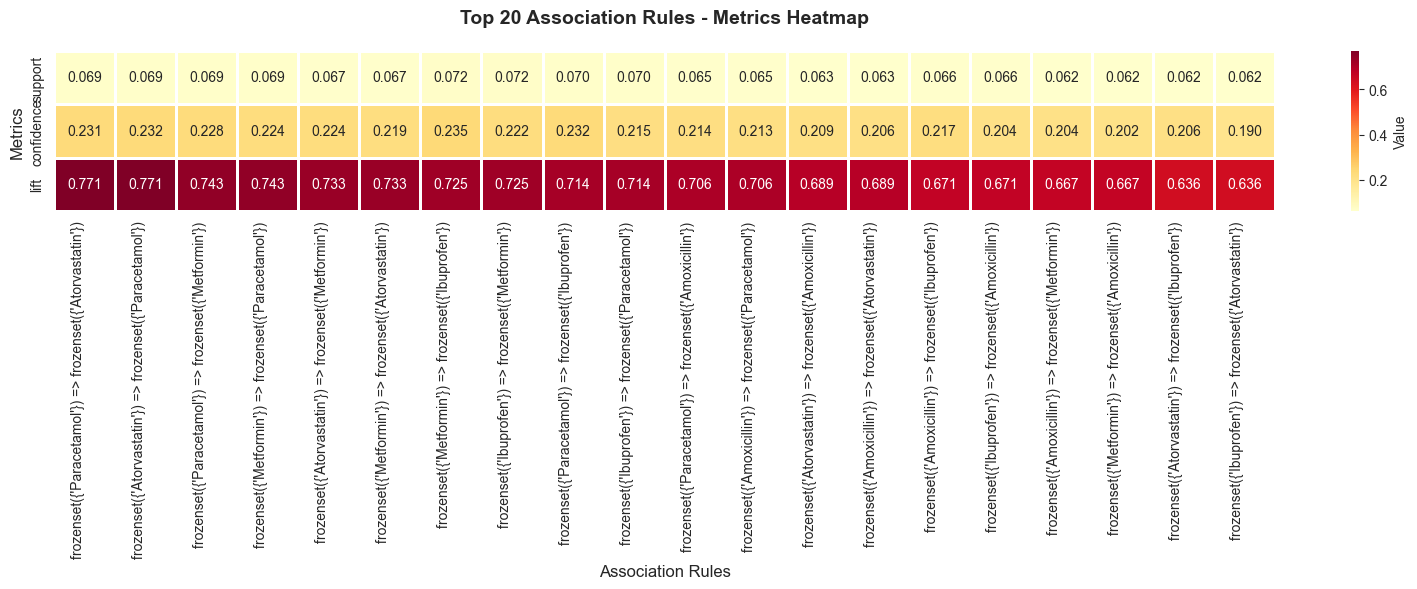

✓ Association rules heatmap saved! (20 rules)


In [96]:
# Top Association Rules Heatmap
print("Creating association rules heatmap...")

# Use the same rules_df from previous cell
if rules_found and len(rules_df) > 0 and 'antecedents' in rules_df.columns and 'consequents' in rules_df.columns:
    # Take top 20 rules
    top_rules = rules_df.nlargest(min(20, len(rules_df)), 'lift')
    
    # Create rule labels
    top_rules['rule'] = top_rules['antecedents'].astype(str) + ' => ' + top_rules['consequents'].astype(str)
    top_rules['rule'] = top_rules['rule'].str[:60]  # Truncate long rules
    
    # Create heatmap data
    heatmap_data = top_rules[['support', 'confidence', 'lift']].T
    heatmap_data.columns = top_rules['rule']
    
    plt.figure(figsize=(16, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd', 
                linewidths=1, cbar_kws={'label': 'Value'})
    plt.title(f'Top {len(top_rules)} Association Rules - Metrics Heatmap', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Association Rules', fontsize=12)
    plt.ylabel('Metrics', fontsize=12)
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.savefig(f'{viz_dir}/association_rules_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Association rules heatmap saved! ({len(top_rules)} rules)")
else:
    print("⚠ Insufficient data for association rules heatmap")
    print("   Note: No association rules were generated by the association mining process.")
    print("   This typically means the data didn't meet minimum support/confidence thresholds.")

## Summary Dashboard

In [97]:
# Create Summary Statistics Dashboard
print("Creating summary statistics dashboard...")

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Patient Demographics', 'Admission Statistics', 
                    'Clinical Metrics', 'Data Quality'),
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}],
           [{'type': 'indicator'}, {'type': 'indicator'}]]
)

# Patient count
fig.add_trace(go.Indicator(
    mode="number+delta",
    value=len(patients_df),
    title={"text": "Total Patients"},
    number={'font': {'size': 40}}
), row=1, col=1)

# Total visits
fig.add_trace(go.Indicator(
    mode="number",
    value=len(visits_df),
    title={"text": "Total Visits"},
    number={'font': {'size': 40}}
), row=1, col=2)

# Average LOS
if 'length_of_stay' in master_df.columns:
    avg_los = master_df['length_of_stay'].mean()
    fig.add_trace(go.Indicator(
        mode="number+gauge",
        value=avg_los,
        title={"text": "Avg Length of Stay (days)"},
        number={'font': {'size': 40}},
        gauge={'axis': {'range': [0, 20]}}
    ), row=2, col=1)

# Readmission rate
if 'Readmission' in master_df.columns:
    readmission_rate = (master_df['Readmission'].sum() / len(master_df)) * 100
    fig.add_trace(go.Indicator(
        mode="number+gauge",
        value=readmission_rate,
        title={"text": "Readmission Rate (%)"},
        number={'font': {'size': 40}, 'suffix': '%'},
        gauge={'axis': {'range': [0, 100]}, 'bar': {'color': 'red'}}
    ), row=2, col=2)

fig.update_layout(
    title_text="Hospital Data Summary Dashboard",
    height=700,
    template='plotly_white'
)

fig.write_html(f'{viz_dir}/summary_dashboard.html')
fig.show()
print("✓ Summary dashboard saved!")

Creating summary statistics dashboard...


✓ Summary dashboard saved!


## Visualization Summary

In [98]:
# Print summary of all created visualizations
print("="*80)
print("VISUALIZATION CREATION SUMMARY")
print("="*80)

import os
viz_files = os.listdir(viz_dir)
png_files = [f for f in viz_files if f.endswith('.png')]
html_files = [f for f in viz_files if f.endswith('.html')]

print(f"\nTotal visualizations created: {len(viz_files)}")
print(f"  - Static images (PNG): {len(png_files)}")
print(f"  - Interactive plots (HTML): {len(html_files)}")

print(f"\n📊 Static Images (PNG):")
for i, file in enumerate(sorted(png_files), 1):
    print(f"  {i}. {file}")

print(f"\n🌐 Interactive Plots (HTML):")
for i, file in enumerate(sorted(html_files), 1):
    print(f"  {i}. {file}")

print(f"\n📁 All visualizations saved to: {os.path.abspath(viz_dir)}")
print("\n✅ Visualization notebook execution complete!")
print("="*80)

VISUALIZATION CREATION SUMMARY

Total visualizations created: 24
  - Static images (PNG): 14
  - Interactive plots (HTML): 10

📊 Static Images (PNG):
  1. admissions_by_day.png
  2. age_distribution.png
  3. association_lift_distribution.png
  4. association_rules_heatmap.png
  5. classification_confusion_matrices.png
  6. classification_feature_importance.png
  7. classification_roc_curves.png
  8. correlation_matrix.png
  9. length_of_stay_analysis.png
  10. readmission_by_age_group.png
  11. regression_actual_vs_predicted.png
  12. regression_model_comparison.png
  13. regression_residuals.png
  14. top_medications_frequency.png

🌐 Interactive Plots (HTML):
  1. admission_time_series.html
  2. association_rules_3d.html
  3. classification_model_comparison.html
  4. icd10_chapter_distribution.html
  5. ml_models_detailed_comparison.html
  6. readmission_by_gender.html
  7. readmission_by_los.html
  8. regression_model_comparison.html
  9. summary_dashboard.html
  10. top_diagnoses.ht